# House Prices prediction

This is the first code I'm writing in
I would to mention some resources I used to build my own 
The Hesham Asem first one who taught me ML
I would thank a lot PEDRO MARCELINO for his notebook and he explains(Some code I copies from his) 

In [38]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import datasets
df_train_B = pd.read_csv('train.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
def correlation(data): # Plot the heatmap to show the relationships between the output and the related variables
    data
    corrmat = df_train.corr()
    plt.subplots(figsize = (12,9))
    sns.heatmap(corrmat , vmax = .8, square = True );
    
    k = 10
    cols = corrmat.nlargest(k , 'SalePrice')['SalePrice'].index
    cm  = np.corrcoef(df_train[cols].values.T)
    plt.subplots(figsize = (12,9))
    sns.set(font_scale = 1.25)
    hm = sns.heatmap(cm , cbar = True , annot = True , square = True , fmt = '.2f', annot_kws={'size':10} , yticklabels = cols.values , xticklabels = cols.values)
    plt.show()
    
def futureselection (data): # Based on our the correlation map we will select the best features 
    data = data    
    cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt' , 'Id']
    data[cols]
    return data[cols]

#missing data
def missingdata (data): # print the number of missing data and percent of total  
    data = data 
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print (missing_data.head(20))

    
'''    

The point here is to test numerical variables in a very lean way. We'll do this paying attention to:

Histogram - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.


'''
def transformation (data , title):
    title = title
    data = data
    data_b = data    
        
    data = np.log(data)   
    
    fig , axes = plt.subplots(2, 2, figsize=(16, 14))
    fig.suptitle('{0} histogram and normal probability plot '.format(title))
    
    sns.distplot(  data_b, fit=norm  , ax = axes[0][0] )
    axes[0][0].set_title('{0} histogram befor transformation'.format(title) )
    
    sns.distplot(  data  , fit=norm , ax = axes[0][1])
    axes[0][1].set_title('{0} histogram after transformation'.format(title))
    
    stats.probplot(data_b, plot=axes[1][0])
    axes[1][0].set_title('{0} normal probability plot befor transformation'.format(title))
       
    stats.probplot(data, plot=axes[1][1])
    axes[1][1].set_title('{0} normal probability plot after transformation'.format(title))        
    plt.show()
    return data

def categorical_variables_plot (x , y , title_x , title_y , backup_data ):
    
    x = x
    
    y = y
    title_x = title_x
    title_y = title_y
    backup_data = backup_data
    
    fig , axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Box plot {0} & {1} '.format(title_x , title_y))
    
    data_A = pd.concat([ backup_data[title_y], backup_data[title_x] ], axis=1)
    
    sns.boxplot(x = title_x , y= title_y , data =  data_A  , ax = axes[0])
      
    axes[0].set_title('Box plot {0} & {1} befor transformation'.format(title_x , title_y))    
    
    data_B = pd.concat([y, x], axis=1)
    
    sns.boxplot(x= title_x, y = title_y, data = data_B , ax = axes[1])
    
    axes[1].set_title('Box plot {0} & {1} after transformation'.format(title_x , title_y))
    
    plt.show()
    
    
def numerical_variables_plot (x , y , title_x , title_y , backup_data ):    

    x = x
    y = y
    title_x = title_x
    title_y = title_y
    
    backup_data = backup_data
    
    fig , axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('bivariate analysis {0} & {1}'.format(title_x , title_y))
    
    
    data_A = pd.concat( [ backup_data[title_y], backup_data[title_x] ] , axis=1)
    
    data_A.plot.scatter(x = title_x , y = title_y, ax = axes[0]);
    
    axes[0].set_title('bivariate analysis {0} & {1} befor transformation'.format(title_x , title_y))
    
    data_B = pd.concat([y, x], axis=1)
    
    data_B.plot.scatter( x = title_x  , y = title_y , ax = axes[1]);
    
    axes[1].set_title('bivariate analysis {0} & {1} after transformation'.format(title_x , title_y))
    

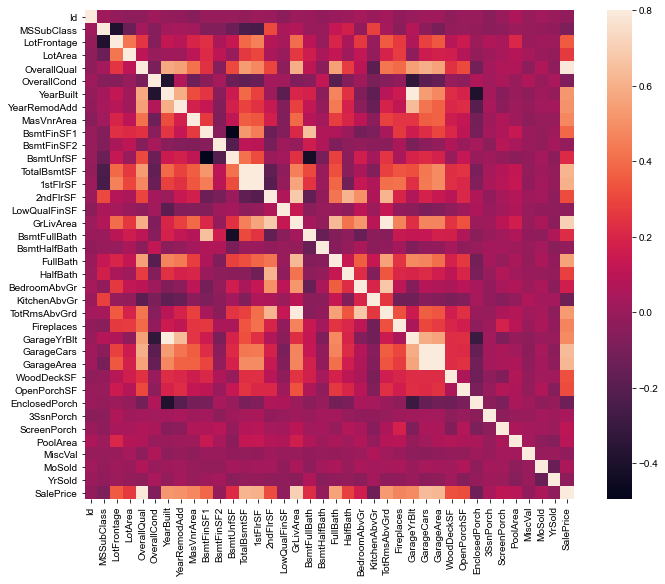

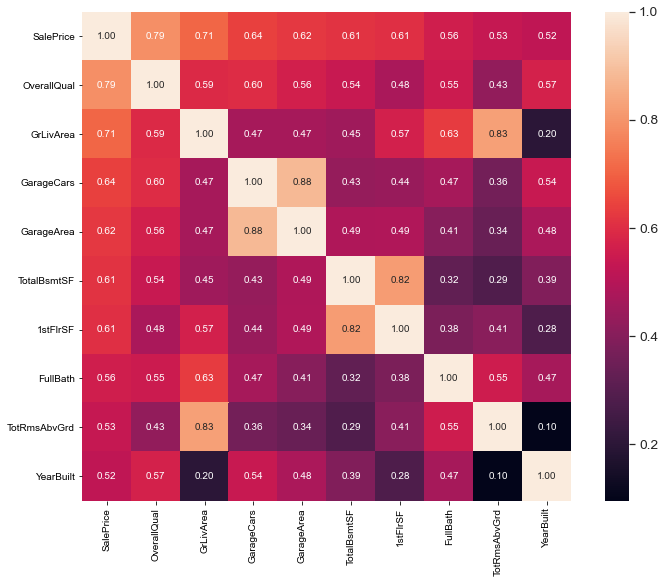

In [6]:
correlation(df_train)


In [7]:
df_train = futureselection (df_train)

In [8]:
missingdata (df_train)

             Total  Percent
SalePrice        0      0.0
OverallQual      0      0.0
GrLivArea        0      0.0
GarageCars       0      0.0
TotalBsmtSF      0      0.0
FullBath         0      0.0
YearBuilt        0      0.0
Id               0      0.0


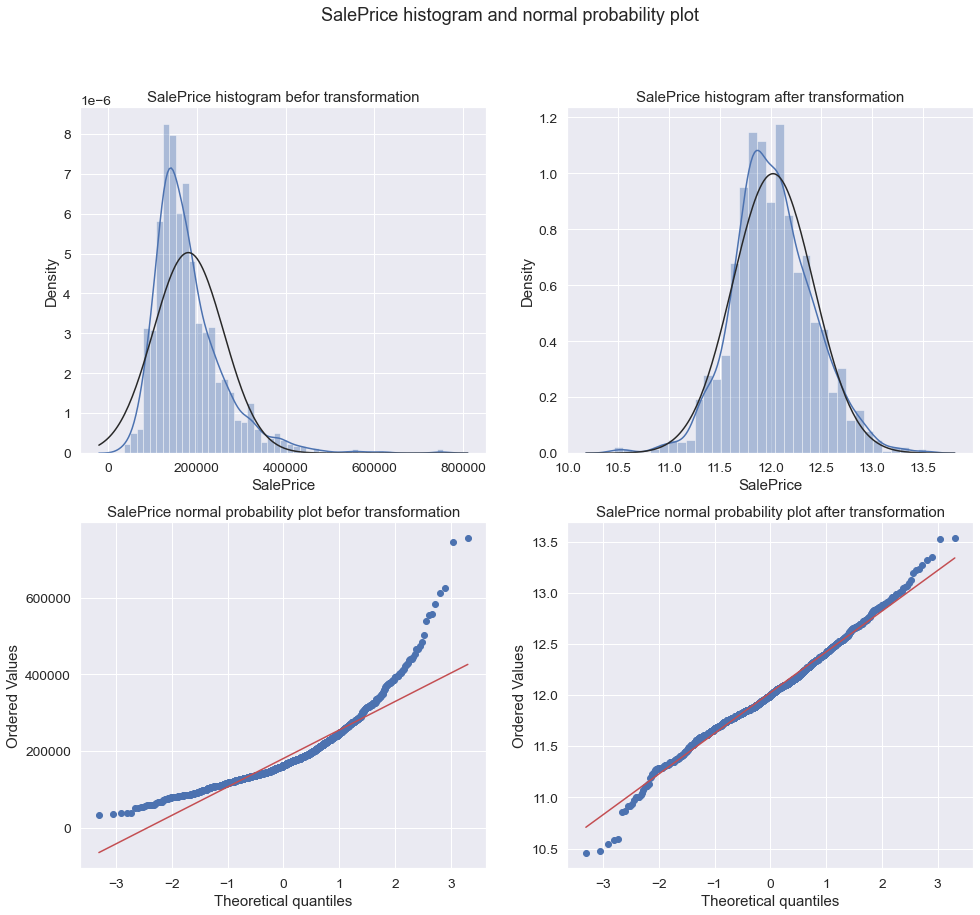

In [9]:
df_train['SalePrice'] = transformation ( df_train['SalePrice']  ,  'SalePrice')

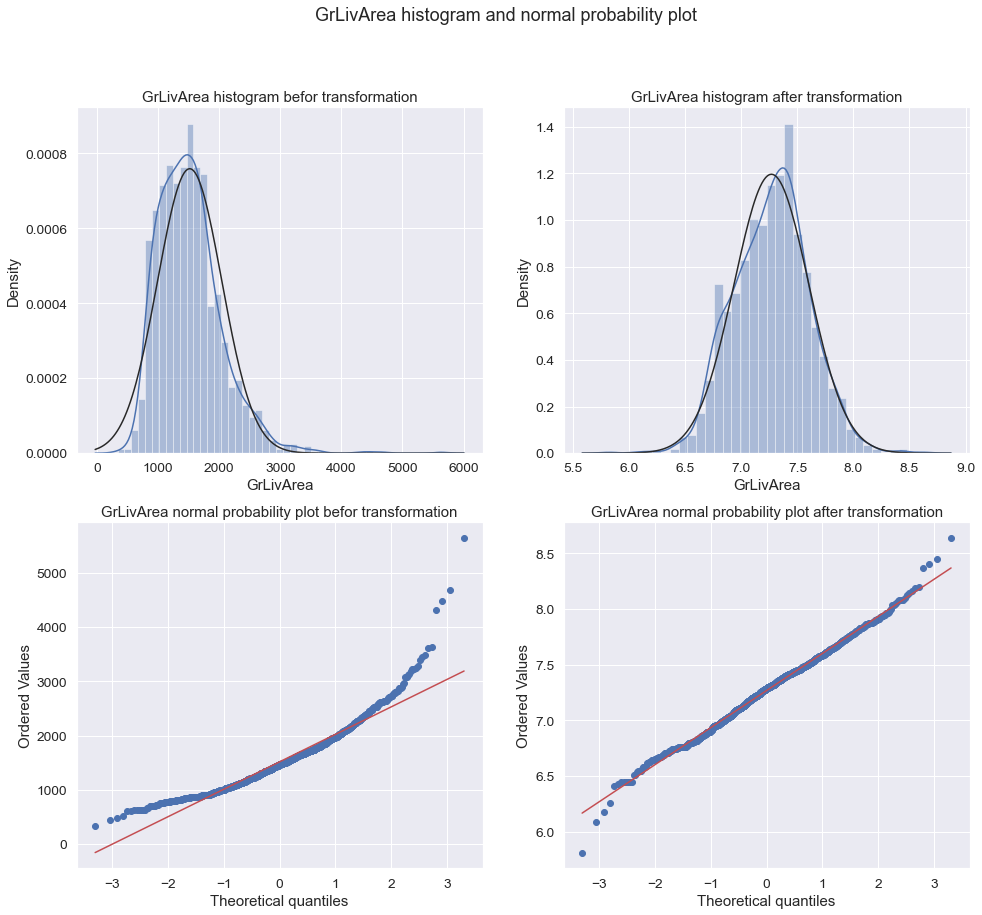

In [10]:
df_train['GrLivArea'] = transformation ( df_train['GrLivArea'], 'GrLivArea')

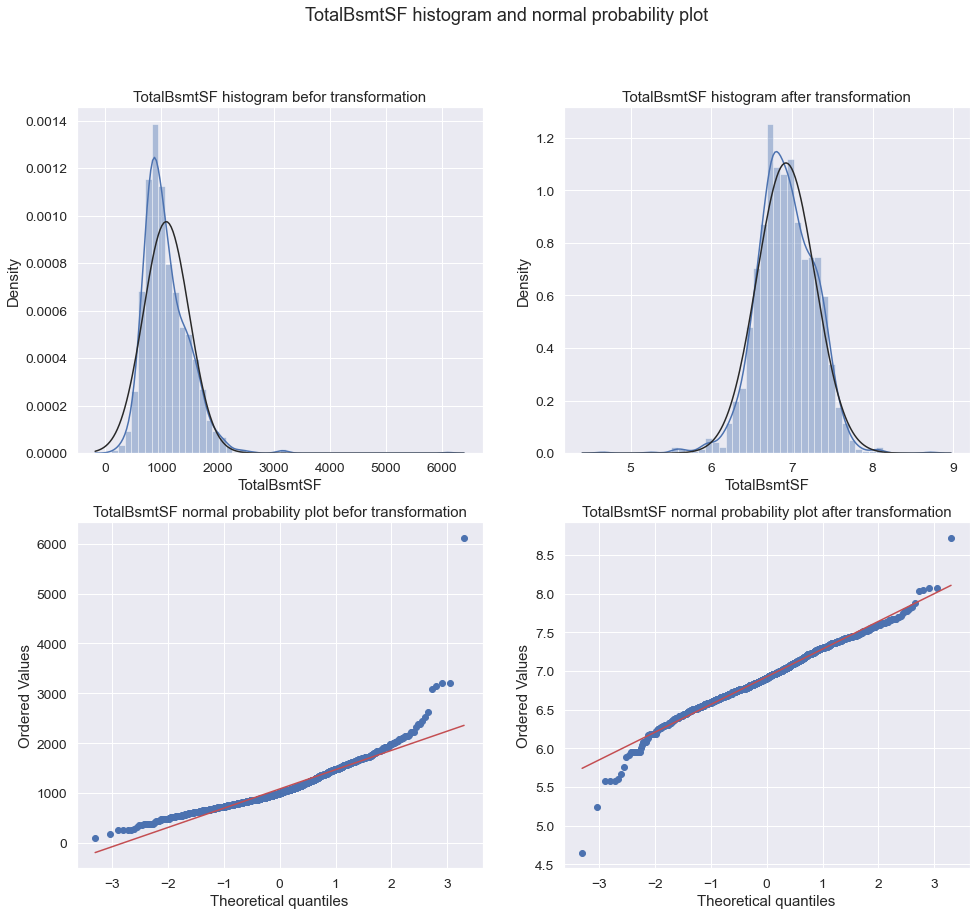

In [11]:
df_train = df_train.drop (df_train.loc[df_train['TotalBsmtSF'] == 0].index) # we delate the zero values
df_train['TotalBsmtSF'] = transformation (  df_train['TotalBsmtSF'] ,   'TotalBsmtSF' )    

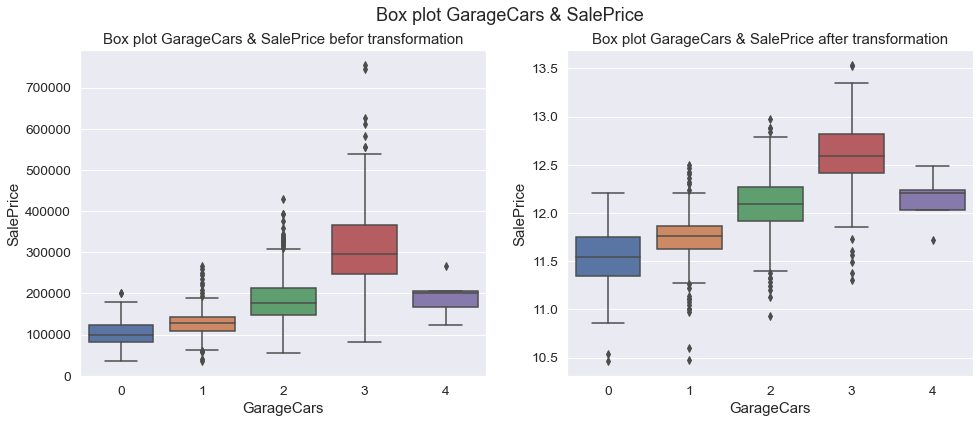

In [12]:
categorical_variables_plot (df_train['GarageCars'] , df_train['SalePrice'] ,'GarageCars' , 'SalePrice' , df_train_B)

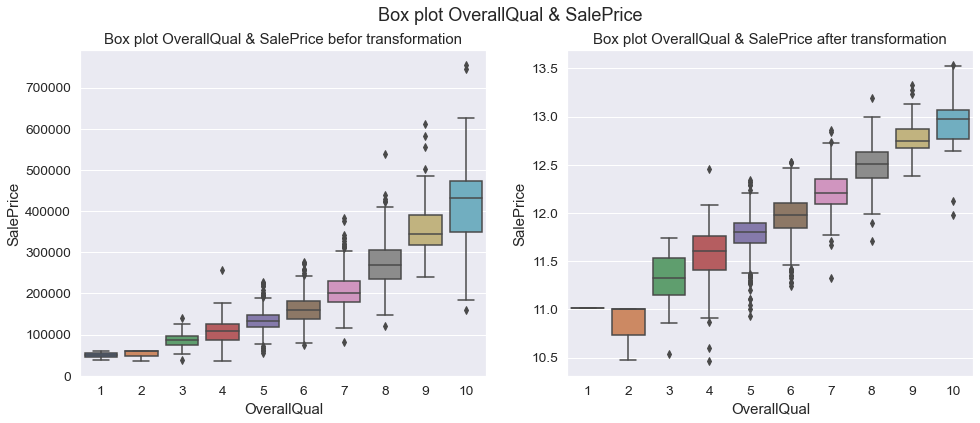

In [13]:
categorical_variables_plot (df_train['OverallQual'] , df_train['SalePrice'] ,'OverallQual' , 'SalePrice' , df_train_B)

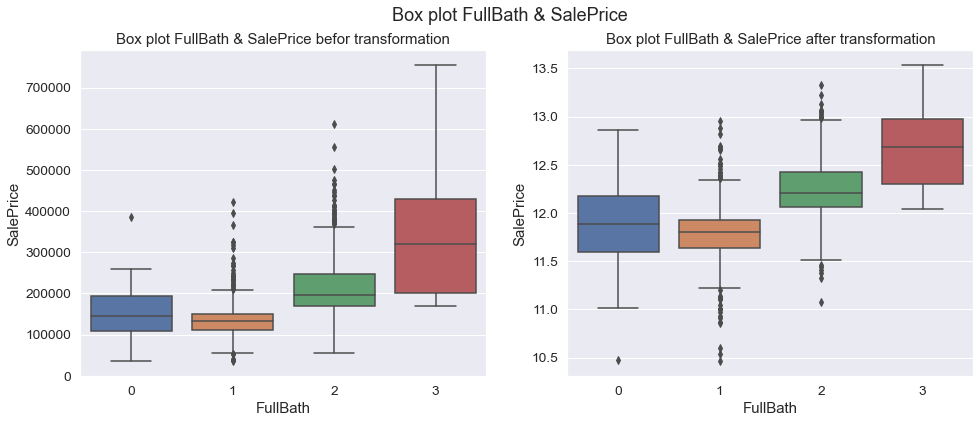

In [14]:
categorical_variables_plot (df_train['FullBath'] , df_train['SalePrice'] ,'FullBath' , 'SalePrice' , df_train_B)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


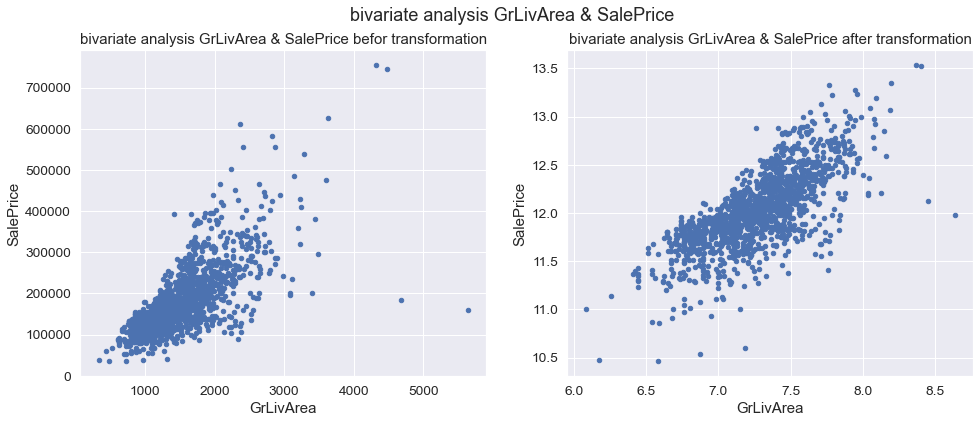

In [15]:
numerical_variables_plot (df_train['GrLivArea'] , df_train['SalePrice'] ,'GrLivArea' , 'SalePrice' , df_train_B)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


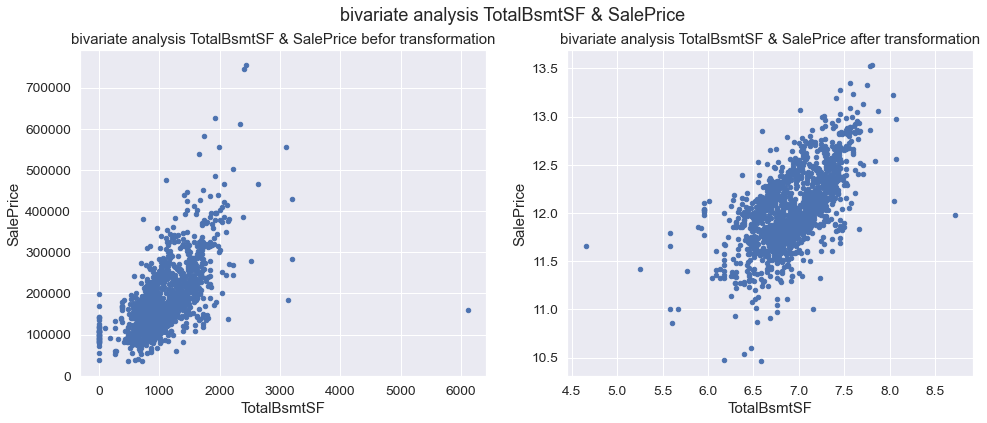

In [16]:
numerical_variables_plot (df_train['TotalBsmtSF'] , df_train['SalePrice'] ,'TotalBsmtSF' , 'SalePrice' , df_train_B)

In [17]:
train = df_train.drop('Id'  , axis=1)

In [18]:
train.head (5)

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,12.247694,7,7.444249,2,6.752270,2,2003
1,12.109011,6,7.140453,2,7.140453,2,1976
2,12.317167,7,7.487734,2,6.824374,2,2001
3,11.849398,7,7.448334,3,6.628041,1,1915
4,12.429216,8,7.695303,3,7.043160,2,2000


In [19]:
missingdata (df_train)

             Total  Percent
SalePrice        0      0.0
OverallQual      0      0.0
GrLivArea        0      0.0
GarageCars       0      0.0
TotalBsmtSF      0      0.0
FullBath         0      0.0
YearBuilt        0      0.0
Id               0      0.0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

In [21]:
# import regression model
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

MSE: 0.0265


Text(0, 0.5, 'Deviance')

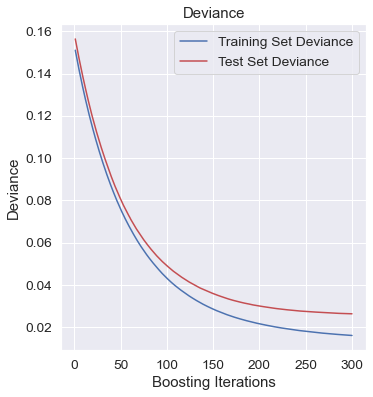

In [22]:
# #############################################################################

params = {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11246458367322873
MSE: 0.026453439051892975
RMSE: 0.16264513227235844


In [37]:
print('Train Score is : ' , clf.score(X_train, y_train))
print('Test Score is : ' , clf.score(X_test,y_pred))

Train Score is :  0.8943479153474037
Test Score is :  1.0


In [26]:
df_test = pd.read_csv('test.csv')
test_id = df_test['Id']

In [27]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
df_test = df_test [cols]


In [28]:
df_test.isnull().sum().sort_values(ascending=False).head(20)

GarageCars     1
TotalBsmtSF    1
OverallQual    0
GrLivArea      0
FullBath       0
YearBuilt      0
dtype: int64

In [29]:
df_test['GarageCars'] =df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['TotalBsmtSF'] =df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())


In [30]:
c = clf.predict(df_test)

In [31]:
xx = np.exp(c)

In [32]:
a = pd.DataFrame(test_id, columns=['Id'])

In [33]:
output  = pd.DataFrame(xx, columns=['SalePrice'])

In [34]:
result = pd.concat([a,output], axis=1)

In [35]:
result.head(5)

,Id,SalePrice
0,1461,167515.286052
1,1462,178416.358111
2,1463,185356.421041
3,1464,205092.877805
4,1465,214434.192710


In [36]:
result.to_csv('submission.csv',index=False)